<a href="https://colab.research.google.com/github/Harshini-R-SpireNSavvy/P1/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/homeprices.csv')
df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


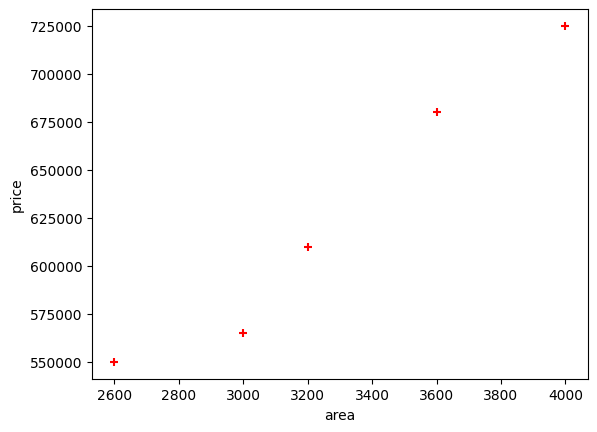

In [40]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [41]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(df[['area']], df['price'])

print(reg.predict([[3300]]))

print("Coefficient:", reg.coef_)
print("Intercept:", reg.intercept_)


[628715.75342466]
Coefficient: [135.78767123]
Intercept: 180616.43835616432


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Y = m * X + b (m is coefficient and b is intercept)


In [42]:

3300*135.78767123 + 180616.43835616432

628715.7534151643

Generate CSV file with list of home price predictions


In [43]:
area_df = pd.read_csv("/content/areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [44]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [45]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [46]:
area_df.to_csv("/content/prediction.csv")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Index(['year', 'per capita income (US$)'], dtype='object')
[1974.82158531]
Coefficient: [0.00107538]
Intercept: 1972.6536140098344


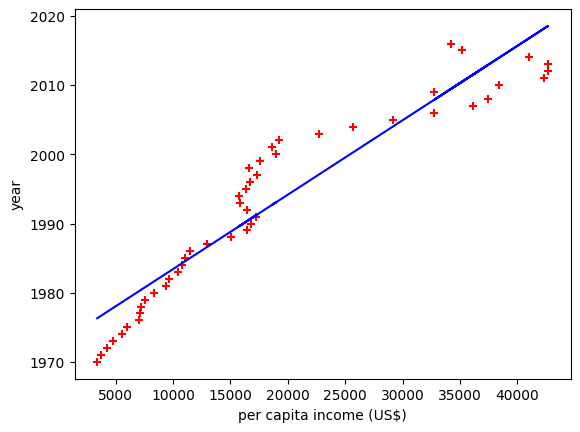

In [47]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/canada_per_capita_income.csv')
print(df.head())
print(df.columns)

X = df[['per capita income (US$)']]   # independent variable
y = df['year']                        # dependent variable

# Create and fit model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Plot
%matplotlib inline
plt.xlabel('per capita income (US$)')
plt.ylabel('year')
plt.scatter(df['per capita income (US$)'], df['year'], color='red', marker='+')
plt.plot(df['per capita income (US$)'], reg.predict(X), color='blue')

# Predictions
print(reg.predict([[2016]]))
print("Coefficient:", reg.coef_)
print("Intercept:", reg.intercept_)


In [48]:
2016*0.00107538 + 1972.6536140098344

1974.8215800898345

LM with Multiple variable


In [49]:
import pandas as pd
import numpy as np
from sklearn import linear_model
df = pd.read_csv('/content/homeprices (1).csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


Data Preprocessing: Fill NA values with median value of a column


In [50]:
df.bedrooms.median()

4.0

In [51]:


df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [52]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)


LinearRegression()

In [53]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [54]:

reg.intercept_


np.float64(221323.00186540396)

In [55]:

reg.predict([[3000, 3, 40]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [56]:

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384


498408.25157402386

In [57]:
!pip install word2number


In [58]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv("/content/hiring.csv")

df.experience = df.experience.fillna(0)

df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())

from word2number import w2n
df.experience = df.experience.apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)

X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

reg = linear_model.LinearRegression()
reg.fit(X, y)

print(reg.predict([[2, 9, 6]]))   # → 53713.86
print(reg.predict([[12, 10, 10]])) # → 93747.79


[53290.89255945]
[92268.07227784]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0 iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002 iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001 iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613 iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832 iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282 iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438 iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738 iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156 iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794 iteration 9


In [60]:
import numpy as np
import matplotlib.pyplot as plt


In [61]:
%matplotlib inline
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd



In [62]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])


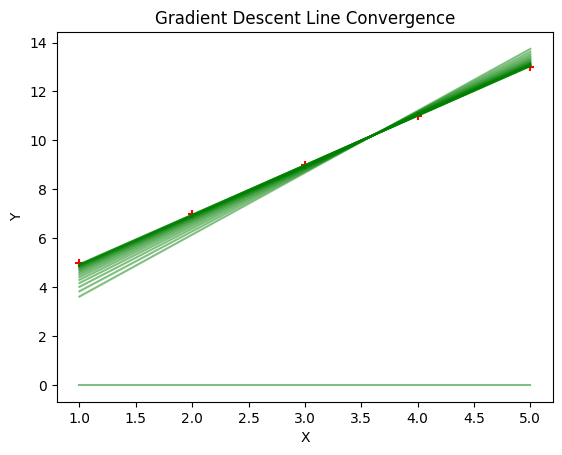

Final slope (m): 2.021391068947519
Final intercept (b): 2.9227714537500327


In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient_descent(x, y):
    m_curr = b_curr = 0
    rate = 0.001
    n = len(x)

    # Scatter plot of data
    plt.scatter(x, y, color='red', marker='+')

    for i in range(10000):
        y_predicted = m_curr * x + b_curr

        # Plot only every 500th step to show convergence
        if i % 500 == 0:
            plt.plot(x, y_predicted, color='green', alpha=0.5)

        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * bd

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gradient Descent Line Convergence")
    plt.show()

    return m_curr, b_curr

# Example data
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

m, b = gradient_descent(x, y)
print("Final slope (m):", m)
print("Final intercept (b):", b)


Save the model in PICKLE

In [72]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(reg,file)

In [73]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [74]:
mp.coef_

array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [76]:
mp.intercept_


np.float64(17237.330313727172)

Save and load in JOBLIB

In [80]:
import joblib

# Save model
joblib.dump(reg, 'model_joblib')

# Load model
model = joblib.load('model_joblib')




In [81]:
# Example with 3 features: [sqft, bathrooms, bedrooms]
print(model.predict([[3300, 3, 2]]))


[9358562.43740712]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [86]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv("/content/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


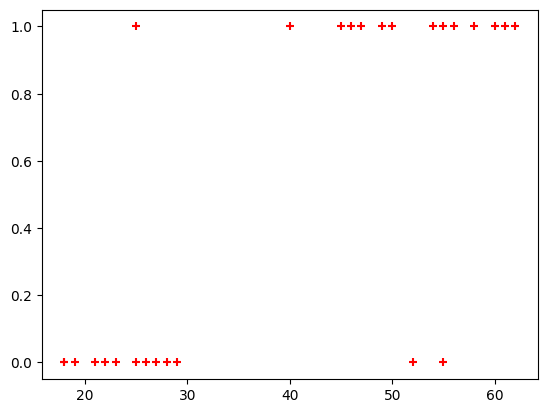

In [87]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)
X_test

,age
3,52
17,58
13,29
24,50
23,45
4,46


In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [90]:
X_test

,age
3,52
17,58
13,29
24,50
23,45
4,46


In [91]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y
age = 35
prediction_function(age)

0.4850044983805899